In [12]:
import pandas as pd
import numpy as np
import json
import ast
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import datetime
import calendar

# Part A - Time Analysis

### 1. Number of Transactions occuring each month

In [3]:
with open('total_transactions.txt', 'r') as f:
    lines = f.readlines()
    
data = ast.literal_eval(lines[0])
df1 = pd.DataFrame(data, columns=['Date', 'Count'])
df1['Count'] = df1['Count'].astype(int)
df1 = df1.sort_values(by='Date')
df1['Date'] = pd.to_datetime(df1['Date'], format='%m/%Y')
df1['Date'] = df1['Date'].dt.strftime('%b %Y') 

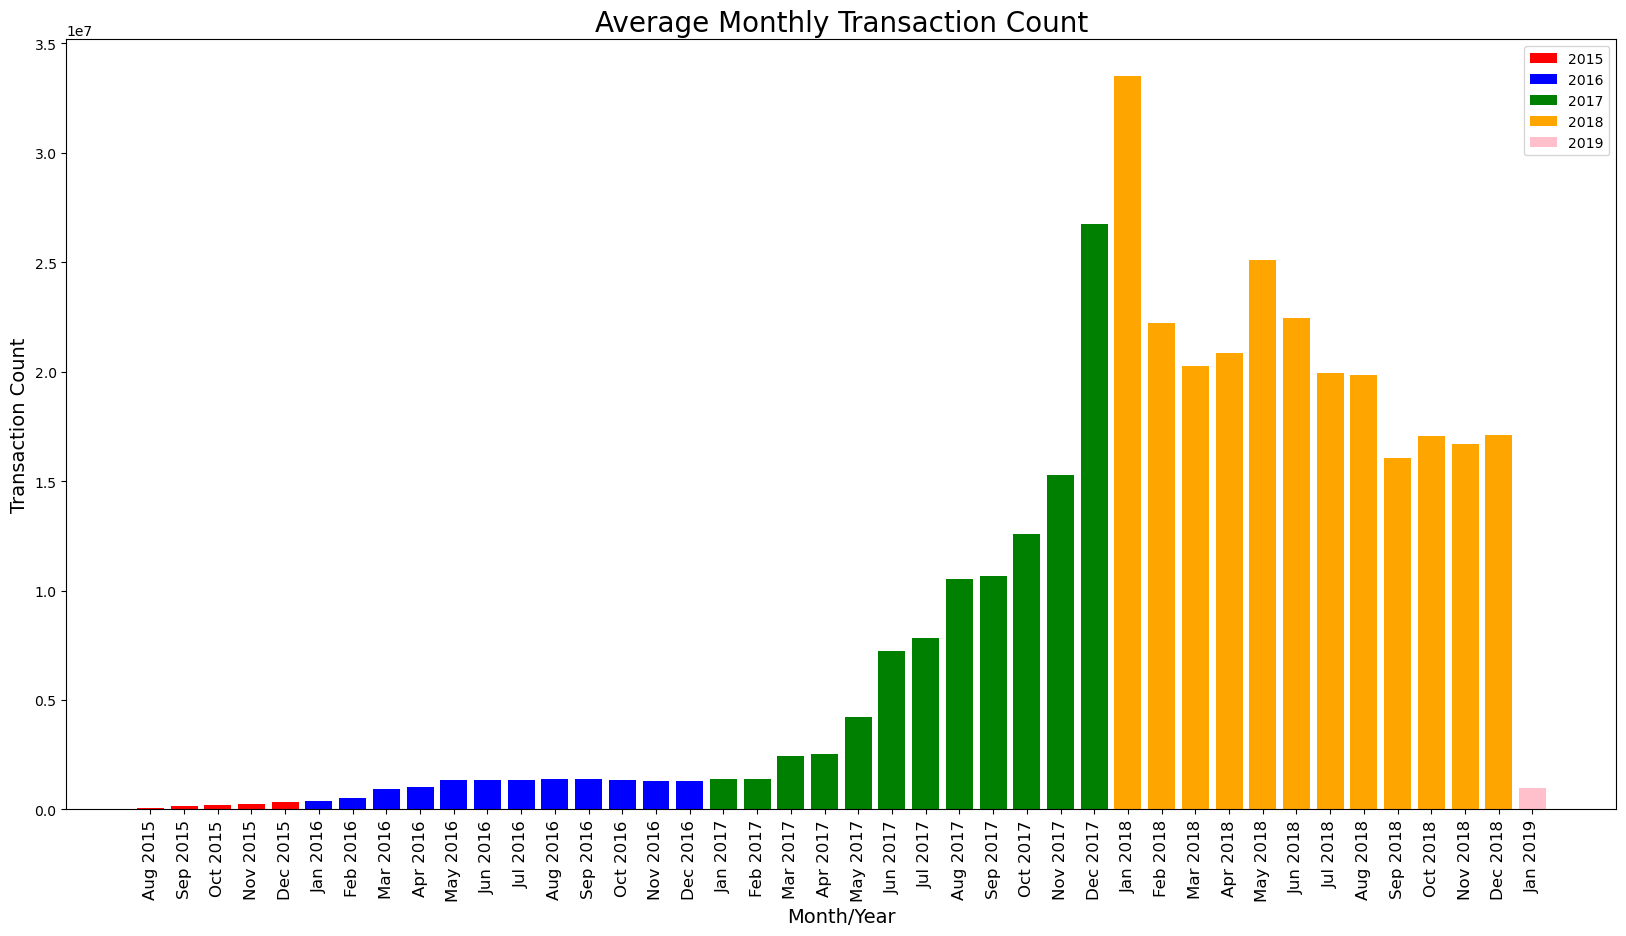

In [4]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90,fontsize=12)
plt.xlabel('Month/Year',fontsize=14)
plt.ylabel('Transaction Count',fontsize=14)
plt.title('Average Monthly Transaction Count',fontsize=20)

years = sorted(df1['Date'].str[-4:].unique())
colors = {'2015': 'red', '2016': 'blue', '2017': 'green', '2018': 'orange', '2019': 'pink'}

for year in years:
    mask = df1['Date'].str.endswith(year)
    x = df1[mask]['Date']
    y = df1[mask]['Count']
    plt.bar(x, y, color=colors[year], label=year)

plt.legend()
plt.show()

### 2. Average Value of Transaction for each month

In [5]:
with open('average_transactions.txt', 'r') as f:
    d = json.load(f)

d = [line.split(',') for line in d]    
df2 = pd.DataFrame(d,columns = ['Date','AverageT'])
df2['AverageT'] = df2['AverageT'].astype(float)
df2 = df2.sort_values(by='Date')
df2['Date'] = pd.to_datetime(df2['Date'], format='%m/%Y')
df2['Date'] = df2['Date'].dt.strftime('%b %Y') 

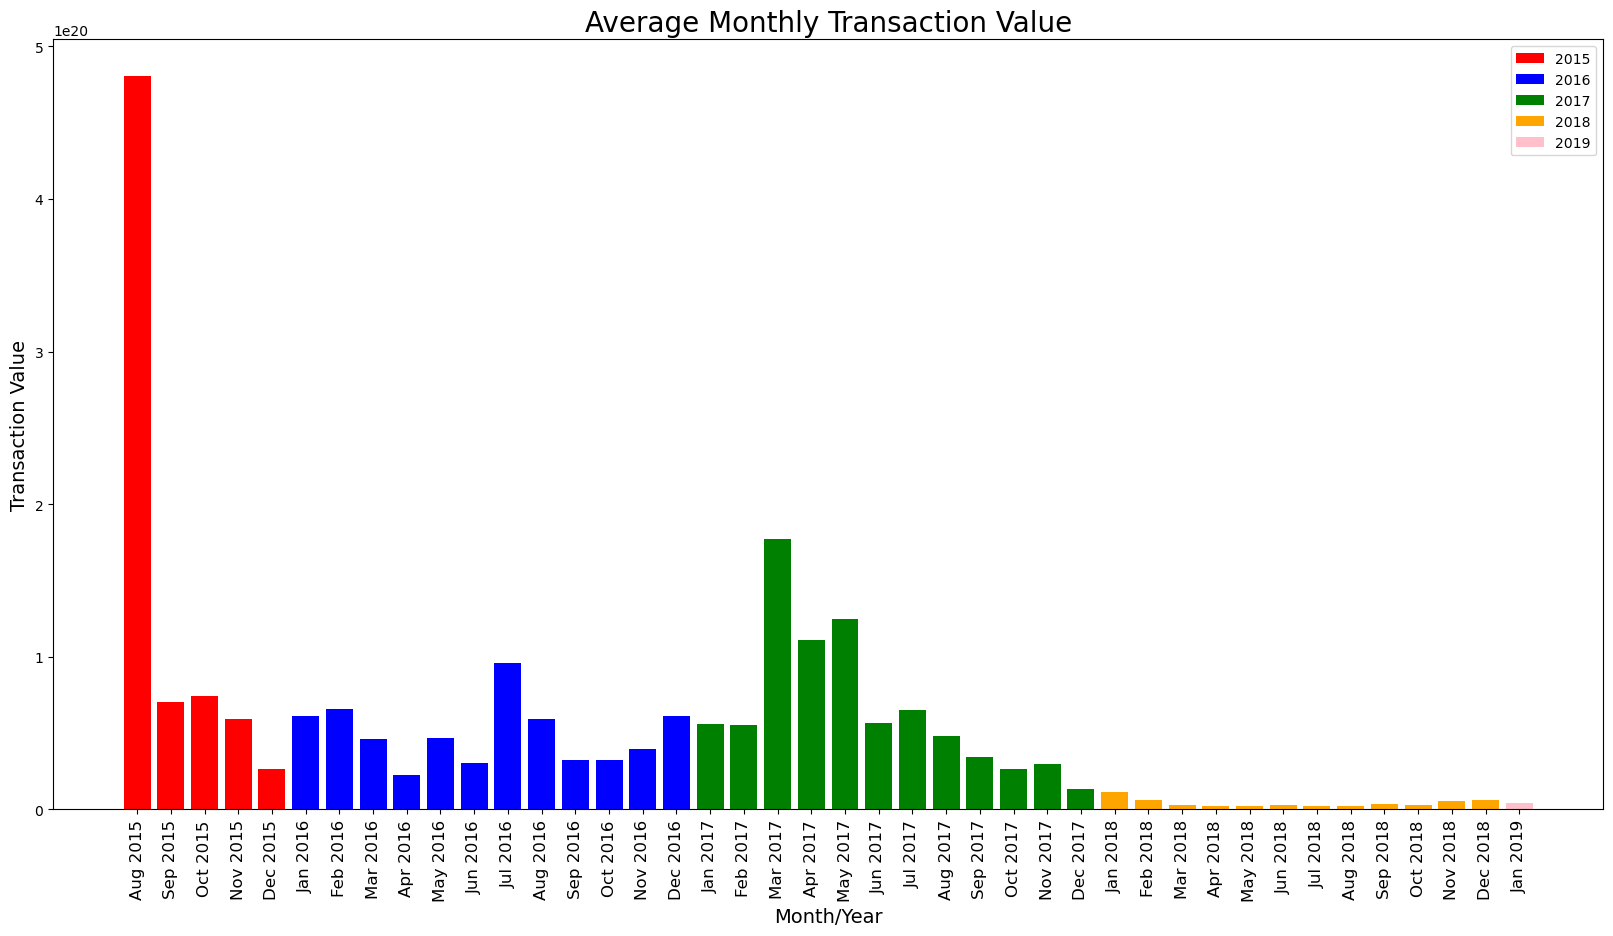

In [6]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90,fontsize=12)
plt.xlabel('Month/Year',fontsize=14)
plt.ylabel('Transaction Value',fontsize=14)
plt.title('Average Monthly Transaction Value',fontsize=20)

years = sorted(df2['Date'].str[-4:].unique()) 
colors = {'2015': 'red', '2016': 'blue', '2017': 'green', '2018': 'orange', '2019': 'pink'} 

for year in years:
    mask = df2['Date'].str.endswith(year)
    x = df2[mask]['Date']
    y = df2[mask]['AverageT']
    plt.bar(x, y, color=colors[year], label=year)
   
plt.legend()
plt.show()

# Part B - Top Ten Most Popular Services

In [7]:
with open('top_10_services.txt', 'r') as f:
    lines = f.readlines()

data = ast.literal_eval(lines[0])
df3 = pd.DataFrame(data, columns=['ID', 'Ethereum Value'])
df3.index += 1
df3.index.name = 'Rank'
display(df3)

,ID,Ethereum Value
Rank,,
1,0xaa1a6e3e6ef20068f7f8d8c835d2d22fd5116444,84155363699941767867374641
2,0x7727e5113d1d161373623e5f49fd568b4f543a9e,45627128512915344587749920
3,0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef,42552989136413198919298969
4,0xbfc39b6f805a9e40e77291aff27aee3c96915bdd,21104195138093660050000000
5,0xe94b04a0fed112f3664e45adb2b8915693dd5ff3,15543077635263742254719409
6,0xabbb6bebfa05aa13e908eaa492bd7a8343760477,10719485945628946136524680
7,0x341e790174e3a4d35b65fdc067b6b5634a61caea,8379000751917755624057500
8,0x58ae42a38d6b33a1e31492b60465fa80da595755,2902709187105736532863818
9,0xc7c7f6660102e9a1fee1390df5c76ea5a5572ed3,1238086114520042000000000


# Part C. Top Ten Most Active Miners

In [8]:
with open('top_10_miners.txt', 'r') as f:
    lines = f.readlines()

data = ast.literal_eval(lines[0])
df4 = pd.DataFrame(data, columns=['Miners', 'Block Size'])
df4.index += 1
df4.index.name = 'Rank'
display(df4)

,Miners,Block Size
Rank,,
1,0xea674fdde714fd979de3edf0f56aa9716b898ec8,17453393724
2,0x829bd824b016326a401d083b33d092293333a830,12310472526
3,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,8825710065
4,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,8451574409
5,0xb2930b35844a230f00e51431acae96fe543a0347,6614130661
6,0x2a65aca4d5fc5b5c859090a6c34d164135398226,3173096011
7,0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb,1152847020
8,0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01,1134151226
9,0x1e9939daaad6924ad004c2560e90804164900341,1080436358


# Part D. Data exploration (40%)

### Scam Analysis - Popular Scams

In [9]:
with open('most_lucrative_scam_forms.txt', 'r') as f:
    data = eval(f.read())
df5 = pd.DataFrame()

for entry in data:
    scam_id = entry[0][0]
    type_of_scam = entry[0][1]
    ether_value = entry[1]
    df5 = df5.append({'Scam Id': scam_id, 'Type of Scam': type_of_scam, 'Ether Value': ether_value}, ignore_index=True)
df5.index = df5.index + 1
df5 = df5.rename_axis("Rank")
display(df5)

,Scam Id,Type of Scam,Ether Value
Rank,,,
1,5622,Scamming,1.670908e+22
2,2135,Phishing,6.583972e+21
3,90,Phishing,5.972590e+21
4,2258,Phishing,3.462808e+21
5,2137,Phishing,3.389914e+21
6,2132,Scamming,2.428075e+21
7,88,Phishing,2.067751e+21
8,2358,Scamming,1.835177e+21
9,2556,Phishing,1.803047e+21


In [13]:
with open("ether_received_over_time.txt") as f:
    data = f.read()
from ast import literal_eval
data = literal_eval(data)
rows = []
for item in data:
    date, scam_info = item[0]
    scam_id, scam_type = scam_info[0], scam_info[0:]
    ether = item[1]
    rows.append([date, scam_id, scam_type, ether])

df6 = pd.DataFrame(rows, columns=['date', 'scam_id', 'scam_type', 'ether'])
df6['date'] = pd.to_datetime(df6['date'])
df6['year'] = df6['date'].dt.year
df6['month'] = df6['date'].dt.month

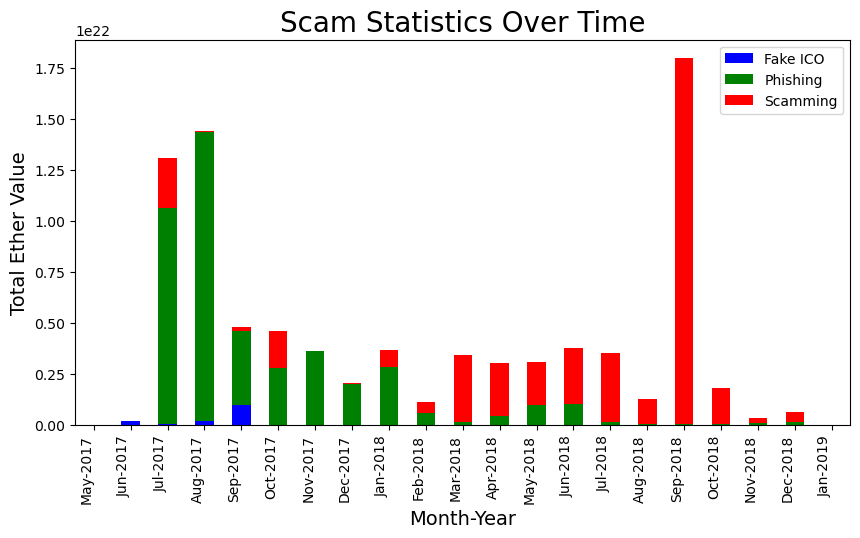

In [14]:
pivot_table = df6.pivot_table(index=['year', 'month'], columns='scam_type', values='ether', aggfunc='sum')
colors = {'Fake ICO': 'blue', 'Scamming': 'red', 'Phishing': 'green'} 
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 5), color=colors)
ax.set_xlabel('Month-Year',fontsize=14)
ax.set_ylabel('Total Ether Value',fontsize=14)
ax.set_title('Scam Statistics Over Time',fontsize=20)
ax.legend(loc='upper right')
labels = [f'{calendar.month_abbr[month]}-{year}' for year, month in pivot_table.index]
ax.set_xticklabels(labels, ha='right')
plt.show()

### Gas Guzzlers

In [15]:
with open('average_gas_price.txt', 'r') as f:
    d = json.load(f)

df7 = pd.DataFrame.from_records(d, columns=['Date', 'AverageGP'])
df7['AverageGP'] = df7['AverageGP'].astype(float)
df7['Date'] = pd.to_datetime(df7['Date'], format='%m/%Y')
df7['Date'] = df7['Date'].dt.strftime('%b %Y')

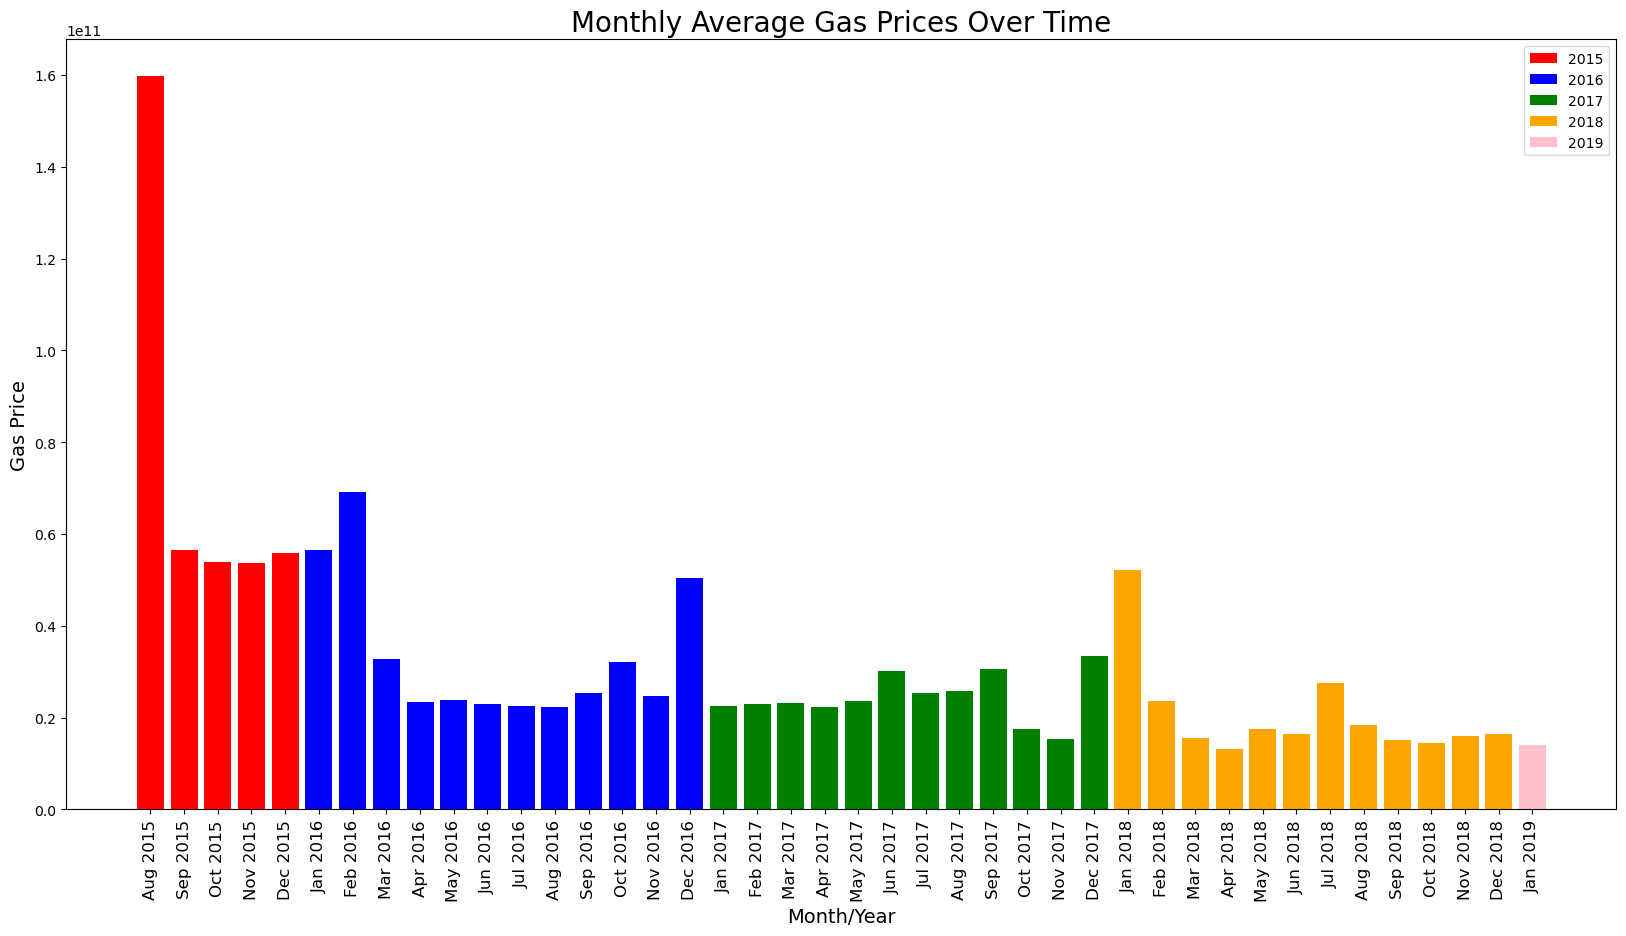

In [16]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Month/Year', fontsize=14)
plt.ylabel('Gas Price', fontsize=14)
plt.title('Monthly Average Gas Prices Over Time', fontsize=20)

years = sorted(df7['Date'].str[-4:].unique()) 
colors = {'2015': 'red', '2016': 'blue', '2017': 'green', '2018': 'orange', '2019': 'pink'} 

for year in years:
    mask = df7['Date'].str.endswith(year)
    x = df7[mask]['Date']
    y = df7[mask]['AverageGP']
    plt.bar(x, y, color=colors[year], label=year)
   
plt.legend()
plt.show()

In [21]:
with open('average_gas_used.txt', 'r') as f:
    lines = f.readlines()
    
data = ast.literal_eval(lines[0])
df8 = pd.DataFrame(data, columns=['Date', 'AverageGU'])
df8['AverageGU'] = df8['AverageGU'].astype(float)
df8['Date'] = pd.to_datetime(df8['Date'], format='%m/%Y')
df8['Date'] = df8['Date'].dt.strftime('%b %Y') 

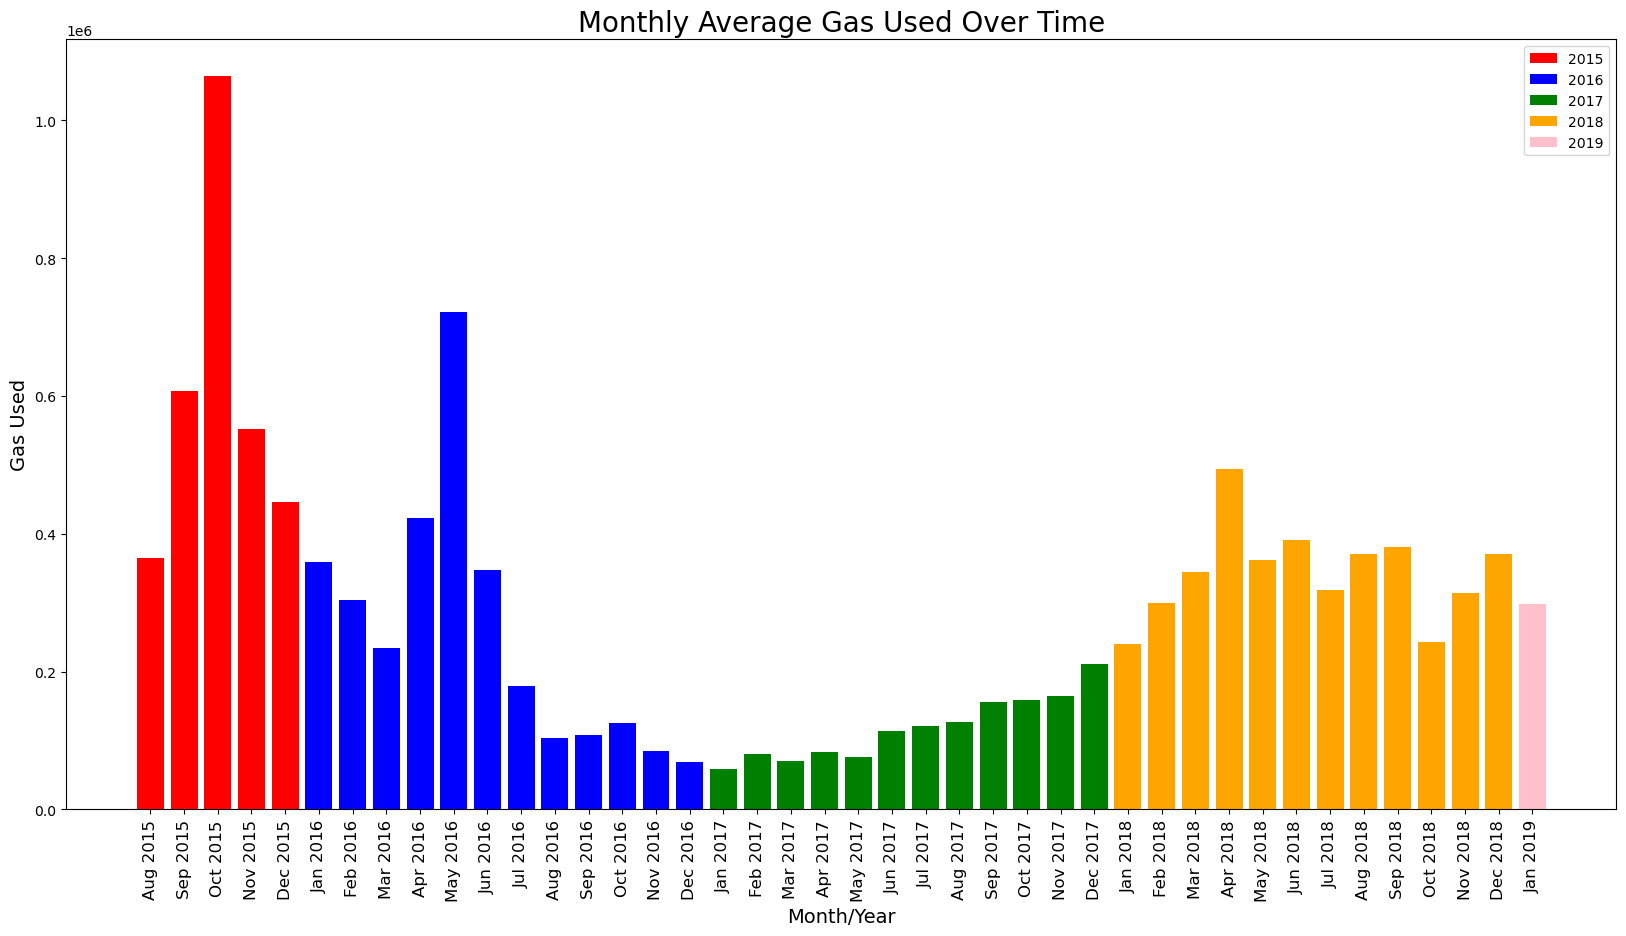

In [22]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Month/Year', fontsize=14)
plt.ylabel('Gas Used', fontsize=14)
plt.title('Monthly Average Gas Used Over Time', fontsize=20)

years = sorted(df8['Date'].str[-4:].unique())
colors = {'2015': 'red', '2016': 'blue', '2017': 'green', '2018': 'orange', '2019': 'pink'}

for year in years:
    mask = df8['Date'].str.endswith(year)
    x = df8[mask]['Date']
    y = df8[mask]['AverageGU']
    plt.bar(x, y, color=colors[year], label=year)

plt.legend()
plt.show()